### EDA on Finacial News
Perform EDA on News Data

In [2]:
# Enables automatic reloading of modules when they change and allows importing from the parent directory.
'''
Allow importing custom modules from the parent directory.
Ensure that any changes to those modules (e.g., editing a .py file in the parent directory) 
are automatically reloaded when you run cells, making development and testing more efficient.
'''

%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(".."))

In [3]:
#Importing necessary libraries for looking up data
import pandas as pd

In [6]:
#Reading the file and seeing the first few rows
df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head(10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [7]:
#summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [47]:
#Importing necessary modules for Analysis
from scripts.finacial_news_eda import (headline_length_stats, article_count_by_publisher
                                       ,analyze_publication_trends, analyze_sentiment
                                       ,sentiment_distribution,generate_wordcloud
                                       ,extract_keywords_and_matches, analyze_publication_frequency
                                       ,analyze_hourly_distribution, spike_detection
                                       ,analyze_publishers, publisher_sentiment, extract_email_domains)

### 1. Descriptive Statistics
Descriptive Statistics:
Obtain basic statistics for textual lengths (like headline length).
Count the number of articles per publisher to identify which publishers are most active.
Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.


In [ ]:
# 1.1 Descriptive statistics of the headline length
headline_length_stats(df, text_col='headline')


--- Headline Length Stats ---
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54



--- Top Publishers by Article Count ---
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


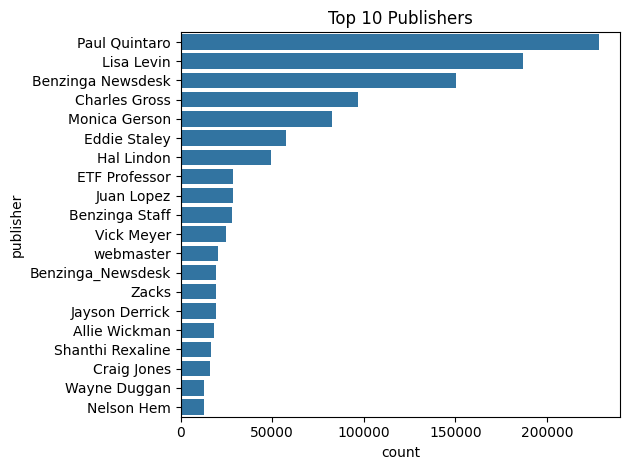

In [11]:
# 1.2 Count articles per publisher to identify the most active publishers.

article_count_by_publisher(df, publisher_col='publisher')  


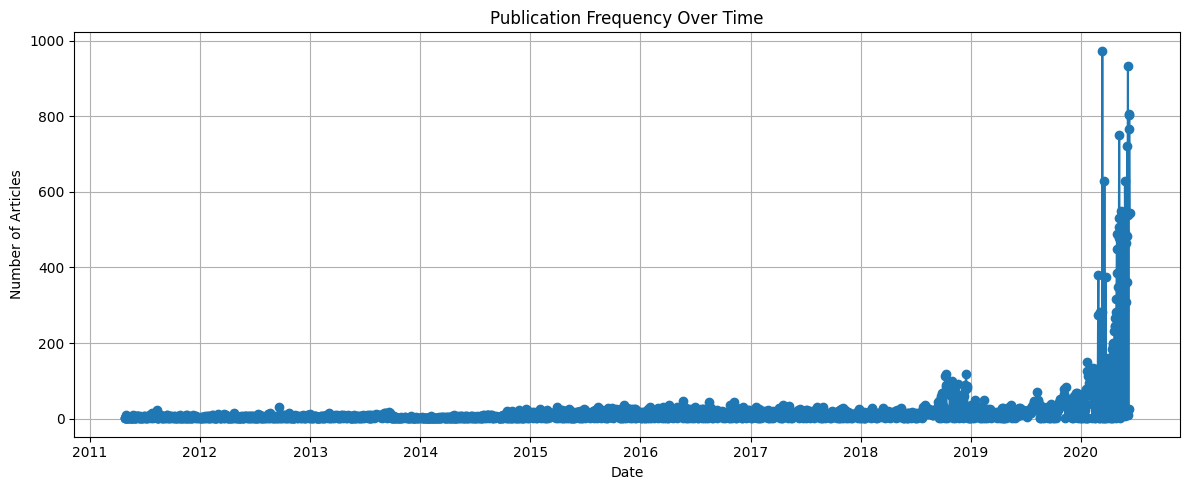

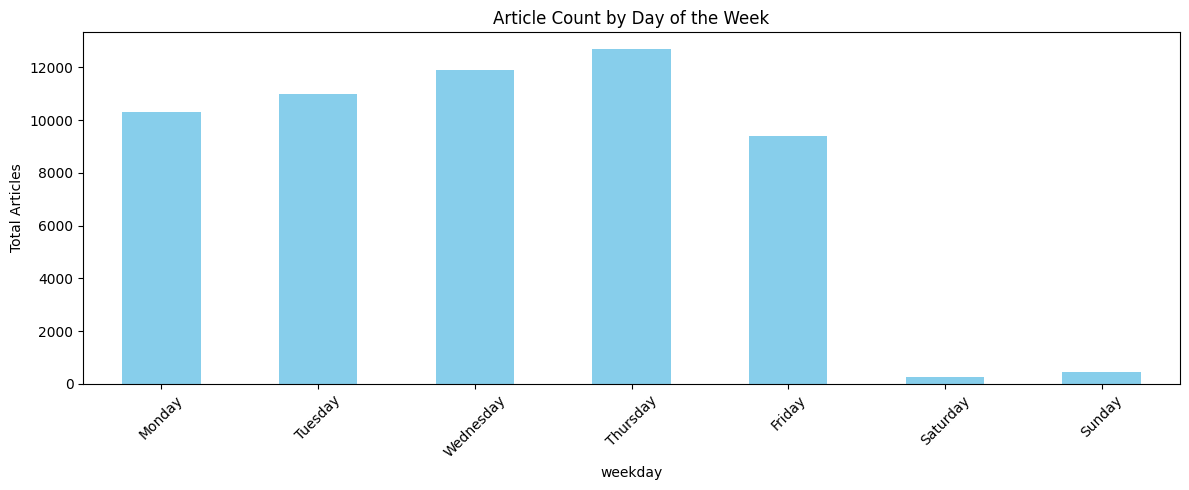

(         Unnamed: 0                                           headline  \
 0                 0            Stocks That Hit 52-Week Highs On Friday   
 1                 1         Stocks That Hit 52-Week Highs On Wednesday   
 2                 2                      71 Biggest Movers From Friday   
 3                 3       46 Stocks Moving In Friday's Mid-Day Session   
 4                 4  B of A Securities Maintains Neutral on Agilent...   
 ...             ...                                                ...   
 1407266     1413787  Chinese Nano-Cap Momentum Stocks Sharply Highe...   
 1407267     1413788  28 Stocks Moving In Wednesday's Pre-Market Ses...   
 1407268     1413789  China Zenix Auto International Reports Q3 EPAD...   
 1407269     1413790                   46 Biggest Movers From Yesterday   
 1407270     1413791      42 Stocks Moving In Tuesday's Mid-Day Session   
 
                                                        url          publisher  \
 0        https:

In [25]:
# 1.3 publication date pattern

analyze_publication_trends(df, date_col='date', return_counts=True, plot=True)


### 2. Text Analysis / Topic Modeling
Text Analysis(Topic Modeling):
Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.)


--- Sentiment Analysis Stats ---
count    1.407328e+06
mean     6.650410e-02
std      2.714077e-01
min     -9.578000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      2.023000e-01
max      9.741000e-01
Name: sentiment, dtype: float64


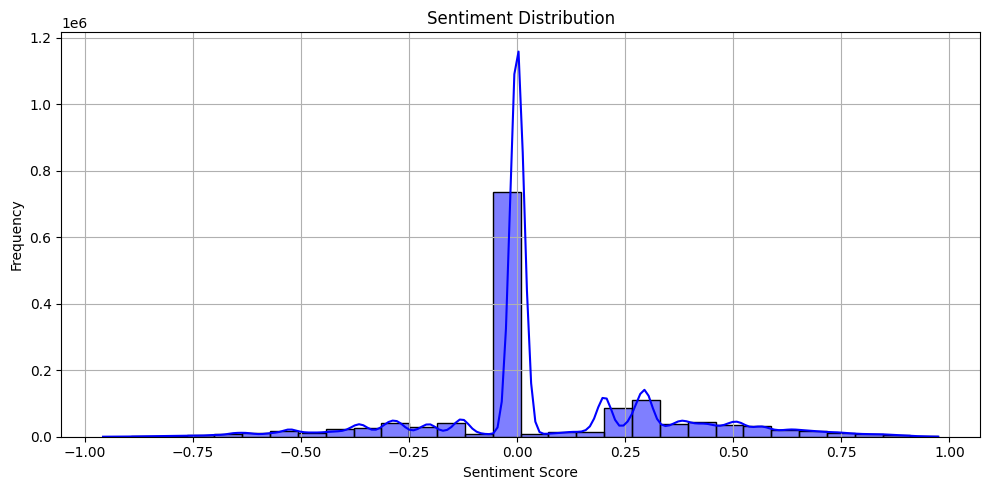

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment,Sentiment_Category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,0.2960,Positive
...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,38,0.2023,Positive
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,52,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,56,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,54,0.0000,Neutral


In [28]:
# 2.1 Sentiment analysis of the headlines

analyze_sentiment(df, text_col='headline')

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



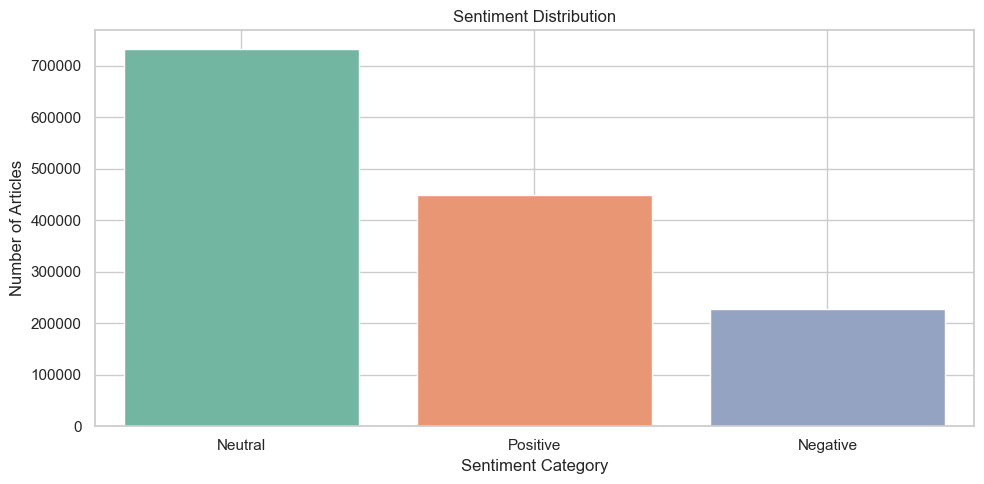

In [30]:
# 2.2 Distribution of sentiment categories
sentiment_distribution(df, sentiment_col='Sentiment_Category')

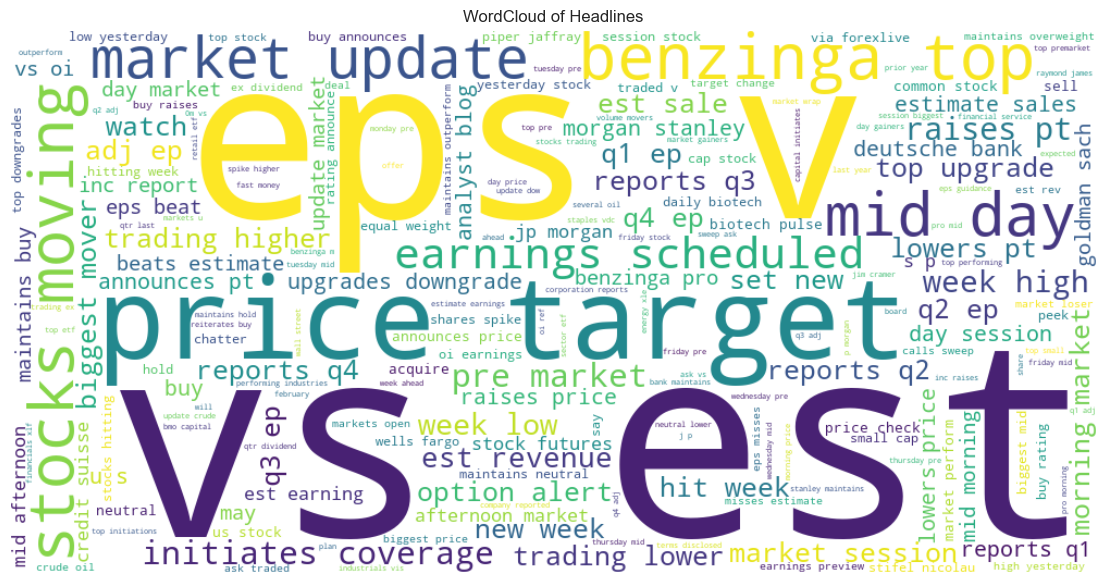

In [31]:
# 2.3 Generate a word cloud of the most common words in the headlines
generate_wordcloud(df, text_col='headline')

In [55]:
#  Extract keywords and matches from the headlines
# extract_keywords_and_matches(df, text_column='headline')

### 3. Time Series Analysis
Time Series Analysis:
How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.


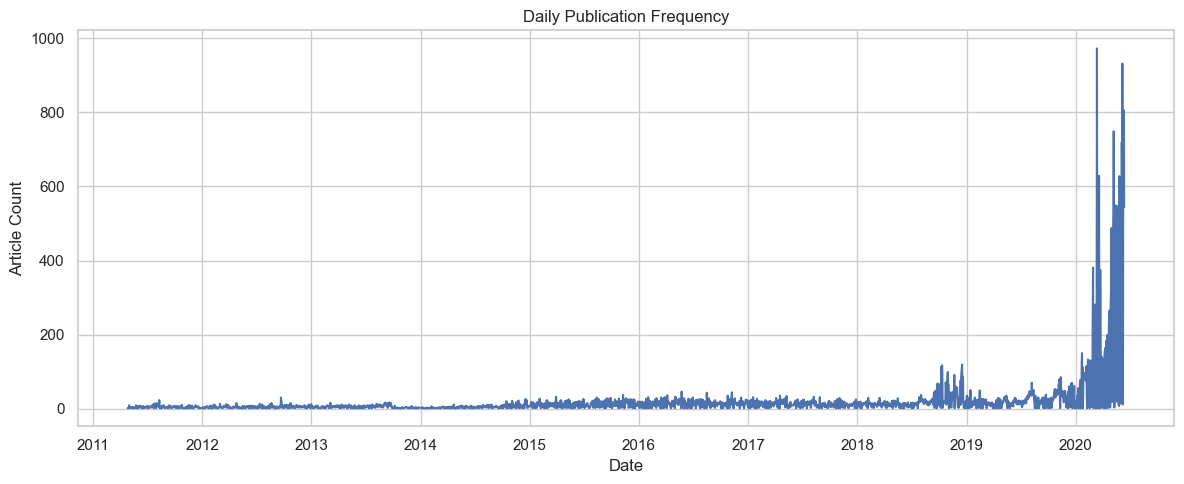

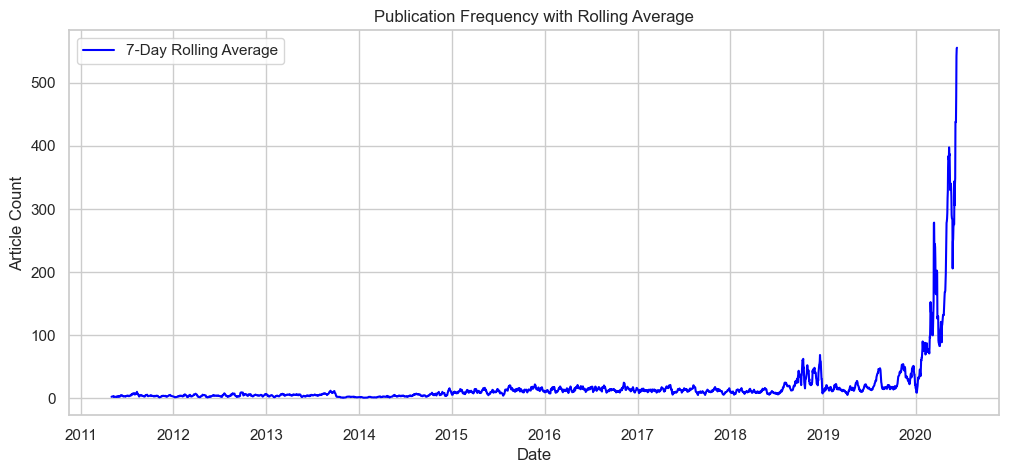

(date_only
 2011-04-27      1
 2011-04-28      2
 2011-04-29      2
 2011-04-30      1
 2011-05-01      1
              ... 
 2020-06-07     25
 2020-06-08    765
 2020-06-09    804
 2020-06-10    806
 2020-06-11    544
 Length: 2528, dtype: int64,
 date_only
 2011-04-27           NaN
 2011-04-28           NaN
 2011-04-29           NaN
 2011-04-30           NaN
 2011-05-01           NaN
                  ...    
 2020-06-07    438.714286
 2020-06-08    478.857143
 2020-06-09    542.142857
 2020-06-10    554.428571
 2020-06-11    555.285714
 Length: 2528, dtype: float64)

In [41]:
# 3.1 plot the distribution of publication frequency over time
analyze_publication_frequency(df, date_col='date')

In [38]:
# 3.2 spike days in publication frequency
spike_detection(df, date_col='date', threshold=1.5)

Spikes detected on:
date_only
2020-01-21    125
2020-01-22    150
2020-02-11    133
2020-02-12    131
2020-02-19    130
             ... 
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 69, dtype: int64


date_only
2020-01-21    125
2020-01-22    150
2020-02-11    133
2020-02-12    131
2020-02-19    130
             ... 
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 69, dtype: int64

c:\Users\ssss\Desktop\## 10 Acadamy\Week1-financial-news-sentiment-analysis\financial-news-sentiment-analysis\scripts\finacial_news_eda.py:212: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  threshold = daily_counts.mean() + 1.5 * daily_counts.std()


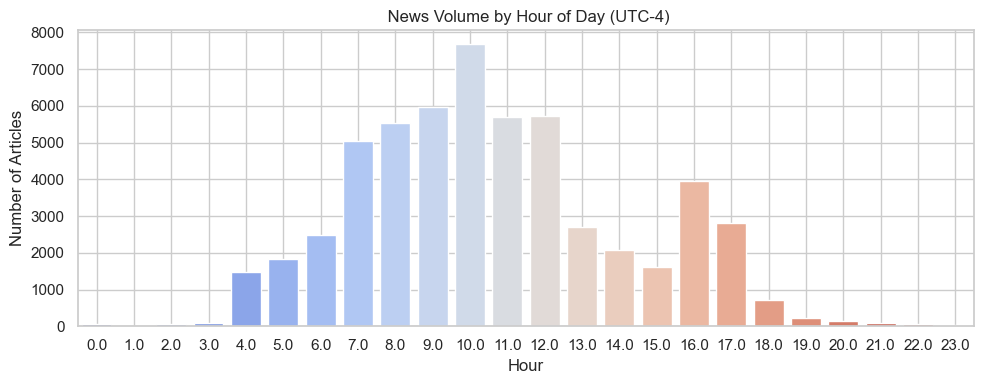

,hour
0,10.0
1,10.0
2,4.0
3,12.0
4,11.0
...,...
1407323,NaN
1407324,NaN
1407325,NaN
1407326,NaN


In [ ]:
#3.3 Analyze hourly distribution of articles
analyze_hourly_distribution(df, date_col='date')

### 4. Publisher Analysis
Which publishers contribute most to the news feed? Is there a difference in the type of news they report?
If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.


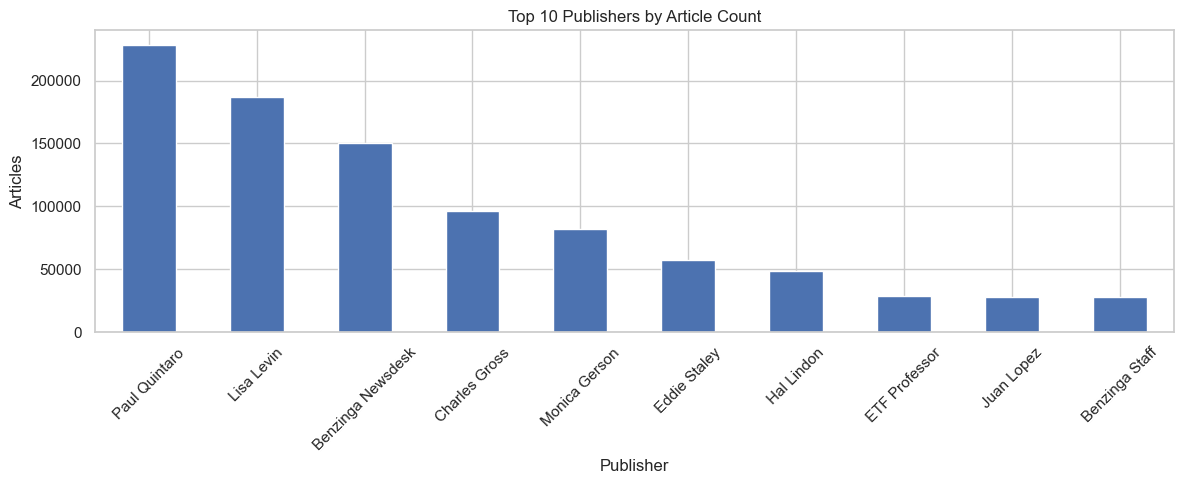

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [44]:
# 4.1 Publisher insights
analyze_publishers(df, publisher_col='publisher', headline_col='headline')


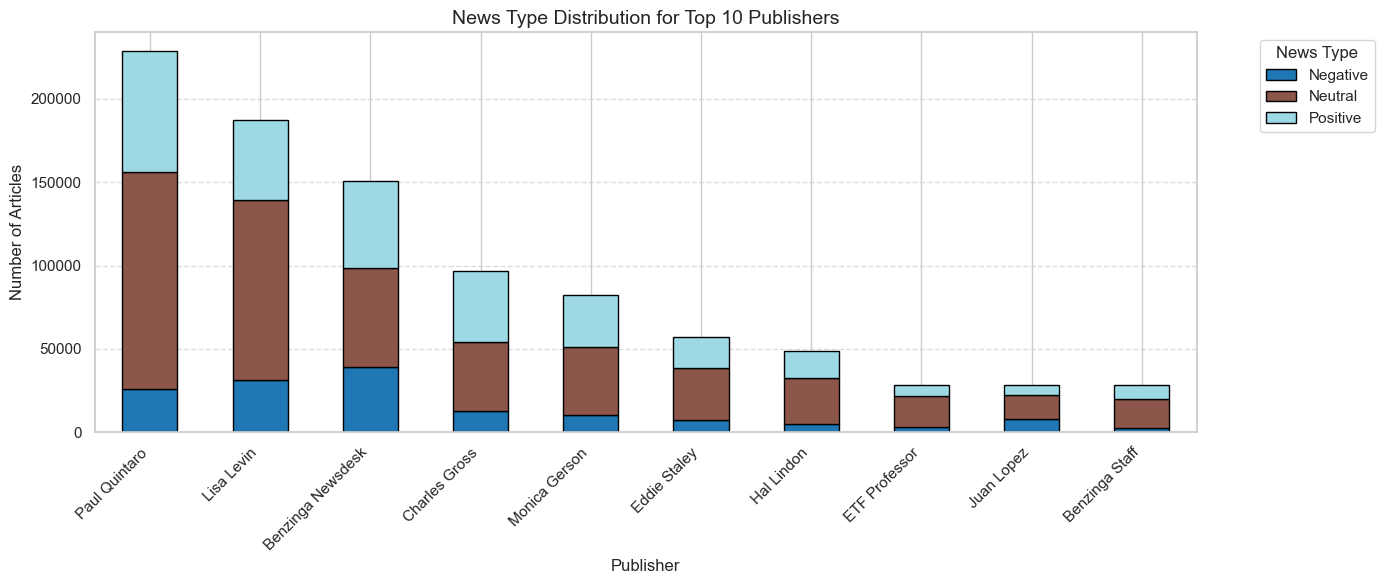

In [49]:
# 4.2 Sentiment analysis by publisher
publisher_sentiment(df, publisher_col='publisher', headline_col='headline')

In [54]:
#4.2 Extract email domains from the publisher column
extract_email_domains(df, publisher_col='publisher')

 Most common email domains in publishers:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64